# Model Testing Code

This code is used to test the model with your own video and generates relative results and figure at the end.

## Enter Input File Name Here

In [77]:
vid='hmdb/test/test (2).avi'
vid='hmdb/test/t5.mp4'

## Load Model

Please put model folder (named hmdbmodel2) in the same directory with this file.

In [41]:
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.metrics as metrices
import seaborn as sns
from video_to_img_hmdb import video_to_img
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import random
import json

In [3]:
model = tf.keras.models.load_model('hmdbmodel2')

## Preprocess Video

In [78]:
fname=vid
if fname.rfind('/')!=-1:
    fname=fname[fname.rfind('/')+1:]

In [79]:
output_dir='testimg/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
elif len(listdir(output_dir))!=0:
    output_dir=str(random.randrange(10000))+output_dir
    os.makedirs(output_dir)
video_to_img(vid,output_dir,is_merged=True,merge_size=5)

In [80]:
imgs=[join(output_dir, f) for f in listdir(output_dir) if isfile(join(output_dir, f))]

In [81]:
X=[]
for f in imgs:
    X.append(cv2.imread(f)/255)
X=np.stack(X,axis=0)

In [82]:
X.shape

(602, 224, 224, 3)

In [83]:
result=model.predict(X)

In [84]:
json_out={}
result_list=[]
for i in range(result.shape[0]):
    result_list.append([(i/30),result[i,0]])
json_out["punch"]=result_list

In [85]:
json_out

{'punch': [[0.0, 1.0],
  [0.03333333333333333, 1.0],
  [0.06666666666666667, 1.0],
  [0.1, 1.0],
  [0.13333333333333333, 1.0],
  [0.16666666666666666, 1.0],
  [0.2, 0.99998987],
  [0.23333333333333334, 0.99973756],
  [0.26666666666666666, 0.9986652],
  [0.3, 0.99705505],
  [0.3333333333333333, 0.99776053],
  [0.36666666666666664, 0.99777824],
  [0.4, 0.99778014],
  [0.43333333333333335, 0.9978023],
  [0.4666666666666667, 0.9978098],
  [0.5, 0.99780184],
  [0.5333333333333333, 0.99778974],
  [0.5666666666666667, 0.99778986],
  [0.6, 0.99779046],
  [0.6333333333333333, 0.9978309],
  [0.6666666666666666, 0.9978249],
  [0.7, 0.9978237],
  [0.7333333333333333, 0.99784946],
  [0.7666666666666667, 0.9979087],
  [0.8, 0.99791306],
  [0.8333333333333334, 0.9980306],
  [0.8666666666666667, 0.99814916],
  [0.9, 0.9982516],
  [0.9333333333333333, 0.9983021],
  [0.9666666666666667, 0.9982658],
  [1.0, 0.99827874],
  [1.0333333333333334, 0.9984157],
  [1.0666666666666667, 0.9984579],
  [1.1, 0.99847

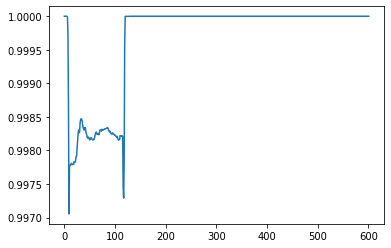

In [86]:
plt.plot(result[:,0])
plt.savefig('result/'+fname+'.png')

In [87]:
result[:,0].shape[0]

602

In [88]:
with open('result/'+fname+'.json', 'w+') as outfile:
    json.dump(str(json_out), outfile)